# Limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

En este notebook se tratará de limpiar los datos en lo que respecta a outliers. Sabemos que tanto el set de train como el de test no tienen nulos, pero en las features numericas no sabemos si algunos valores pueden estar fuera del grueso de la distribucion.

In [2]:
df_train_labels = pd.read_csv('../data/train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('../data/train_values.csv', low_memory=False)
df_test = pd.read_csv('../data/test_values.csv', index_col='building_id', low_memory=False)
df_train = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_train.set_index('building_id', inplace=True)

In [3]:
# Creo columna de damage_grade = -1 como dummy para poder juntar los 2 datasets
df_test['damage_grade'] = -1
df_test.head(1)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,-1


In [4]:
df_train.head(1)

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train_test = df_train.append(df_test, ignore_index=False, sort=False)
df_train_test.shape

(347469, 39)

In [6]:
df_train_test.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Chequeo de nulos

In [7]:
df_train_test.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

## Chequeo de duplicados

Revisamos si hay registros iguales por error de carga. A priori como los datasets tienen un building_id, esto no deberia suceder.

In [8]:
posibles_duplicados = df_train_test[df_train_test.duplicated()]
posibles_duplicados

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
242723,1,20,508,11256,2,10,9,6,t,w,...,0,0,0,0,0,0,0,0,0,0
461019,3,21,111,11714,2,10,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0
505127,2,6,1108,5909,2,30,4,7,t,r,...,0,0,0,0,0,0,0,0,0,0
553217,3,27,269,11121,2,15,10,7,n,r,...,0,0,0,0,0,0,0,0,0,0
369695,3,10,1382,5036,2,15,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937909,-1,8,979,1792,2,10,7,4,t,r,...,0,0,0,0,0,0,0,0,0,0
907593,-1,2,1156,10084,2,20,7,4,t,r,...,0,0,0,0,0,0,0,0,0,0
636695,-1,8,1415,3525,3,25,4,8,t,r,...,0,0,0,0,0,0,0,0,0,0


In [9]:
posibles_duplicados = posibles_duplicados.reset_index()

In [10]:
posibles_duplicados.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,242723,1,20,508,11256,2,10,9,6,t,...,0,0,0,0,0,0,0,0,0,0
1,461019,3,21,111,11714,2,10,9,5,t,...,0,0,0,0,0,0,0,0,0,0
2,505127,2,6,1108,5909,2,30,4,7,t,...,0,0,0,0,0,0,0,0,0,0
3,553217,3,27,269,11121,2,15,10,7,n,...,0,0,0,0,0,0,0,0,0,0
4,369695,3,10,1382,5036,2,15,5,5,t,...,0,0,0,0,0,0,0,0,0,0


In [11]:
posibles_duplicados['building_id'].value_counts()

242723    1
319544    1
600267    1
452422    1
428369    1
         ..
446810    1
317561    1
772085    1
649401    1
166180    1
Name: building_id, Length: 14362, dtype: int64

In [12]:
posibles_duplicados['building_id'].value_counts().sum()

14362

Vemos que los posibles duplicados no lo son ya que tienen distinto building_id

## Verificando outliers

En particular, usamos el metodo de boxplot con su intercuantil. Si un valor es mayor a 3 \* IQR por arriba del Q3, el valor es considerado un outlier. Al mismo tiempo, si un valor es menor a 3 \* IQR por abajo de Q1, entonces el valor va a ser considerado un outlier.

> https://www.listendata.com/2015/01/detecting-and-solving-problem-of-outlier.html

In [13]:
def eliminar_outliers_segun_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    h = 3 * iqr
    # Reemplazamos los outliers
    df.loc[df[feature] > q3 + h, feature] = q3 + h
    df.loc[df[feature] < q1 - h, feature] = q1 - h

### count_floors_pre_eq

In [14]:
df_train_test['count_floors_pre_eq'].value_counts()

2    209029
3     74171
1     53705
4      7186
5      3039
6       283
7        52
8         3
9         1
Name: count_floors_pre_eq, dtype: int64

In [15]:
df_train_test['count_floors_pre_eq'].describe()

count             347,469.00
mean                    2.13
std                     0.73
min                     1.00
25%                     2.00
50%                     2.00
75%                     2.00
max                     9.00
Name: count_floors_pre_eq, dtype: float64

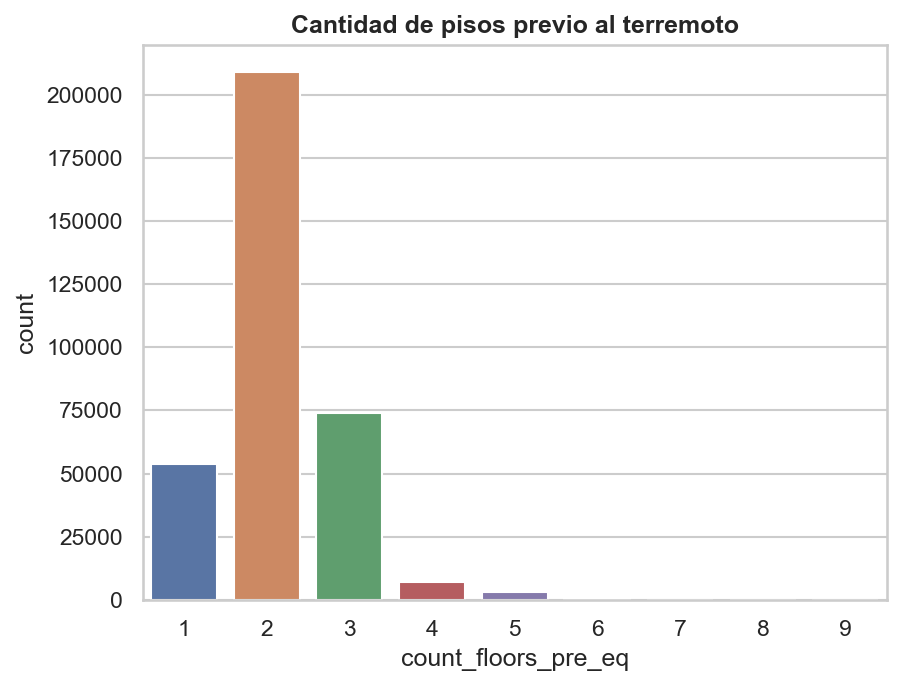

In [16]:
plt.figure(dpi=150)
sns.countplot(df_train_test['count_floors_pre_eq'])
plt.title("Cantidad de pisos previo al terremoto", weight='bold')
plt.show()

In [17]:
df_train_test.loc[(df_train_test['count_floors_pre_eq'] > 3), 'count_floors_pre_eq'] = 3

In [18]:
df_train_test['count_floors_pre_eq'].describe()

count             347,469.00
mean                    2.09
std                     0.62
min                     1.00
25%                     2.00
50%                     2.00
75%                     2.00
max                     3.00
Name: count_floors_pre_eq, dtype: float64

In [19]:
df_train_test['count_floors_pre_eq'].value_counts()

2    209029
3     84735
1     53705
Name: count_floors_pre_eq, dtype: int64

### Age

In [20]:
df_train_test['age'].value_counts()

10     51680
15     48074
5      45045
20     42792
0      34725
25     32586
30     23977
35     14420
40     14050
50      9619
45      6255
60      4773
80      4087
55      2695
70      2679
100     1880
995     1851
65      1497
90      1426
85      1133
75       693
95       547
120      236
150      179
110      142
200      140
105      119
125       62
115       30
130       13
140       11
180       11
160        8
170        7
190        5
175        5
135        5
155        4
145        3
195        2
165        2
185        1
Name: age, dtype: int64

In [21]:
df_train_test['age'].describe()

count             347,469.00
mean                   26.54
std                    73.53
min                     0.00
25%                    10.00
50%                    15.00
75%                    30.00
max                   995.00
Name: age, dtype: float64

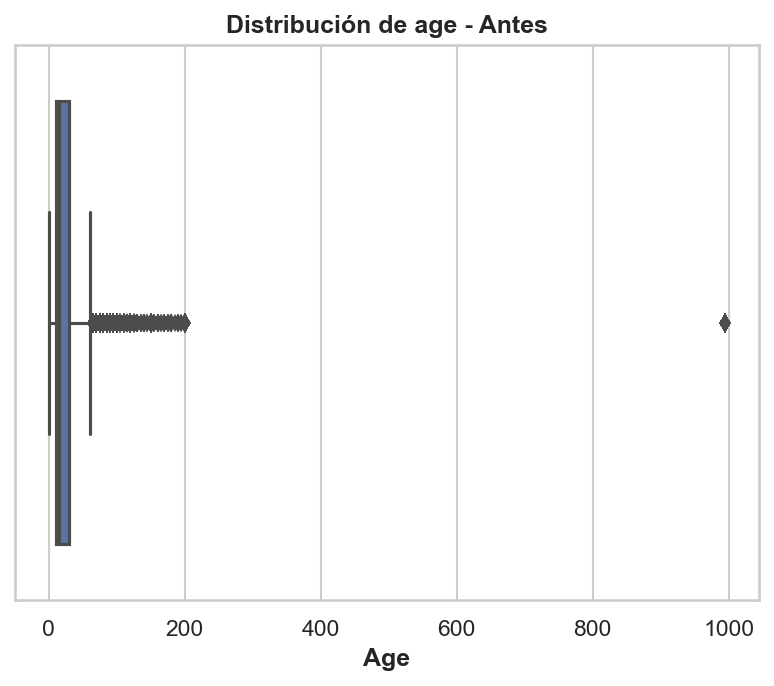

In [22]:
data = df_train_test['age']
plt.figure(dpi=150)
plt.title("Distribución de age - Antes", weight='bold')
sns.boxplot(data)
plt.xlabel('Age', weight='bold')
plt.show()

In [23]:
eliminar_outliers_segun_iqr(df_train_test, 'age')

In [24]:
df_train_test['age'].value_counts()

10    51680
15    48074
5     45045
20    42792
0     34725
25    32586
30    23977
35    14420
40    14050
50     9619
90     6689
45     6255
60     4773
80     4087
55     2695
70     2679
65     1497
85     1133
75      693
Name: age, dtype: int64

In [25]:
df_train_test['age'].describe()

count             347,469.00
mean                   21.52
std                    19.29
min                     0.00
25%                    10.00
50%                    15.00
75%                    30.00
max                    90.00
Name: age, dtype: float64

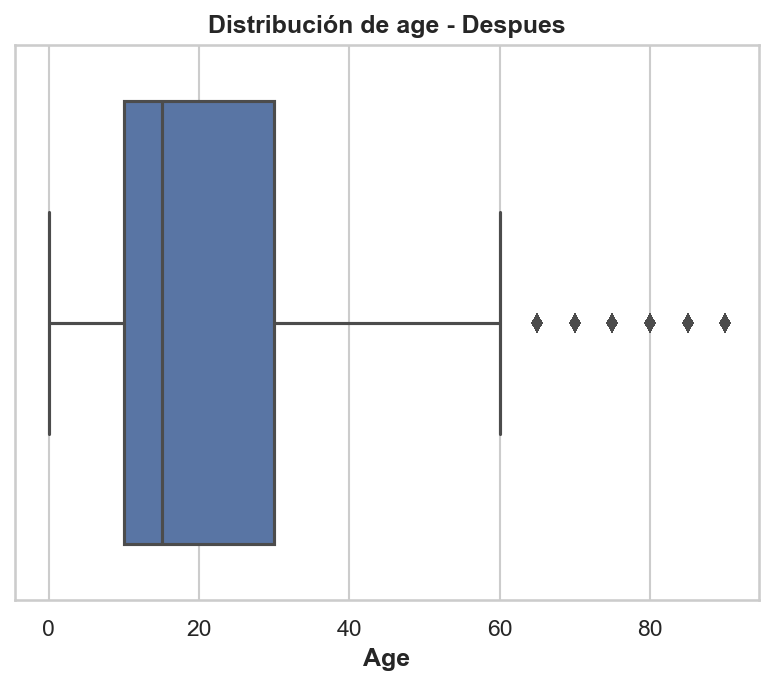

In [26]:
data = df_train_test['age']
plt.figure(dpi=150)
plt.title("Distribución de age - Despues", weight='bold')
sns.boxplot(data)
plt.xlabel('Age', weight='bold')
plt.show()

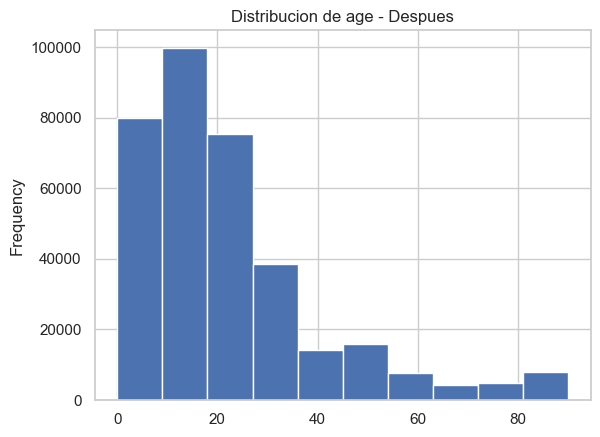

In [27]:
df_train_test['age'].plot(kind = 'hist', title='Distribucion de age - Despues')
plt.show()

### Area percentage

In [28]:
df_train_test['area_percentage'].value_counts()

6      55959
7      49140
5      43556
8      37988
9      29572
       ...  
75         1
90         1
82         1
100        1
81         1
Name: area_percentage, Length: 86, dtype: int64

In [29]:
df_train_test['area_percentage'].describe()

count             347,469.00
mean                    8.02
std                     4.39
min                     1.00
25%                     5.00
50%                     7.00
75%                     9.00
max                   100.00
Name: area_percentage, dtype: float64

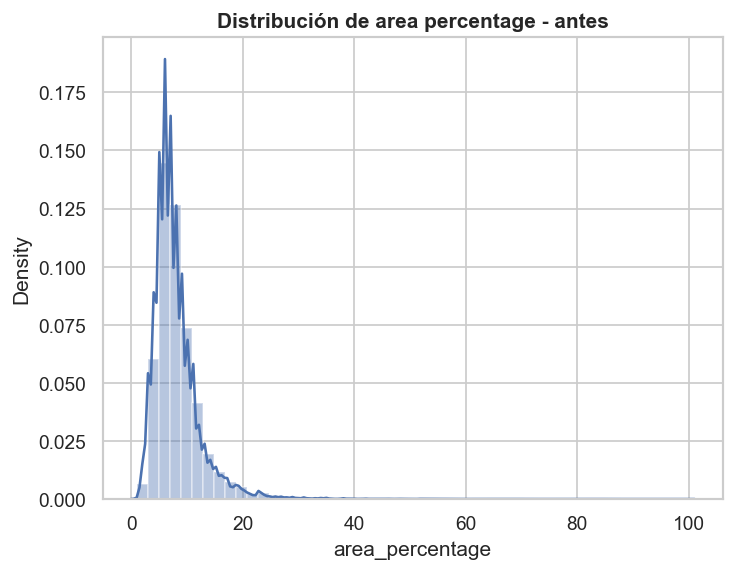

In [30]:
plt.figure(dpi=125)
sns.distplot(df_train_test['area_percentage'])
plt.title("Distribución de area percentage - antes", weight='bold')
plt.show()

In [31]:
eliminar_outliers_segun_iqr(df_train_test, 'area_percentage')
df_train_test['area_percentage'].describe()

count             347,469.00
mean                    7.90
std                     3.73
min                     1.00
25%                     5.00
50%                     7.00
75%                     9.00
max                    21.00
Name: area_percentage, dtype: float64

In [32]:
df_train_test['area_percentage'].value_counts()

6     55959
7     49140
5     43556
8     37988
9     29572
4     25675
10    21030
11    18390
3     15687
12    10148
13     7725
21     6030
14     5532
15     4668
2      4275
16     3465
17     3237
19     2118
18     1738
20     1411
1       125
Name: area_percentage, dtype: int64

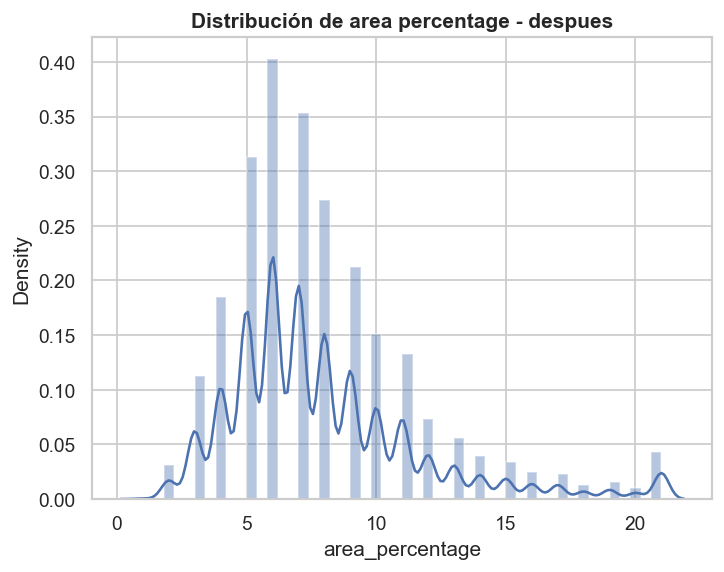

In [33]:
plt.figure(dpi=125)
sns.distplot(df_train_test['area_percentage'])
plt.title("Distribución de area percentage - despues", weight='bold')
plt.show()

### Height percentage

In [34]:
df_train_test['height_percentage'].value_counts()

5     104869
6      61837
4      50427
7      47360
3      34535
8      18460
2      12348
9       7146
10      5934
12      1246
11      1242
13      1036
15       399
16       246
18        95
32        90
14        85
20        41
21        21
23        12
17        11
19         8
24         6
25         4
26         3
22         3
28         2
31         2
29         1
Name: height_percentage, dtype: int64

In [35]:
df_train_test['height_percentage'].describe()

count             347,469.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

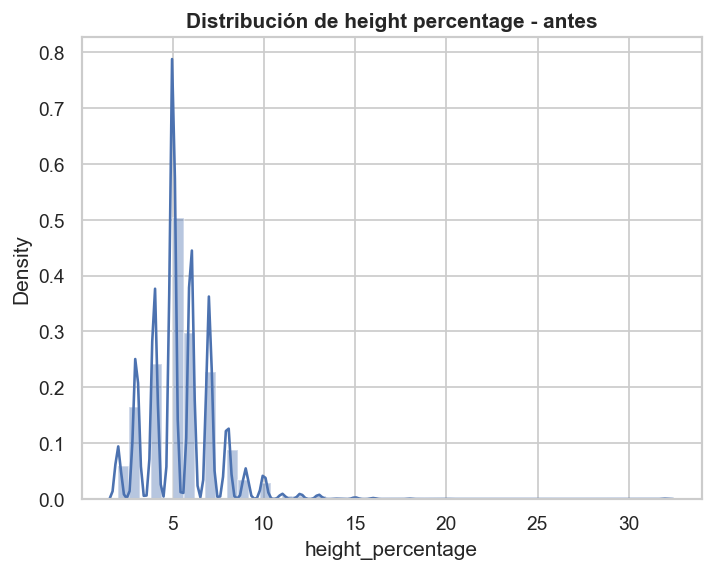

In [36]:
plt.figure(dpi=125)
sns.distplot(df_train_test['height_percentage'])
plt.title("Distribución de height percentage - antes", weight='bold')
plt.show()

In [37]:
eliminar_outliers_segun_iqr(df_train_test, 'height_percentage')
df_train_test['height_percentage'].describe()

count             347,469.00
mean                    5.42
std                     1.80
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    12.00
Name: height_percentage, dtype: float64

In [38]:
df_train_test['height_percentage'].value_counts()

5     104869
6      61837
4      50427
7      47360
3      34535
8      18460
2      12348
9       7146
10      5934
12      3311
11      1242
Name: height_percentage, dtype: int64

### Count families

In [39]:
df_train_test['count_families'].value_counts()

1    301377
0     27937
2     15010
3      2415
4       547
5       135
6        33
7         8
9         4
8         3
Name: count_families, dtype: int64

In [40]:
df_train_test['count_families'].describe()

count             347,469.00
mean                    0.98
std                     0.42
min                     0.00
25%                     1.00
50%                     1.00
75%                     1.00
max                     9.00
Name: count_families, dtype: float64

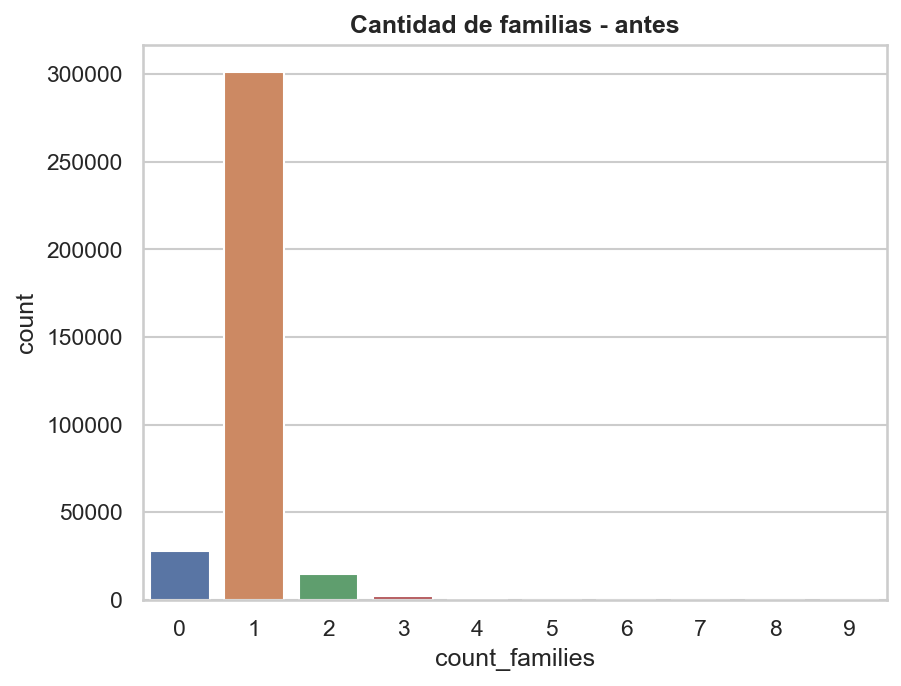

In [41]:
plt.figure(dpi=150)
sns.countplot(df_train_test['count_families'])
plt.title("Cantidad de familias - antes", weight='bold')
plt.show()

In [42]:
df_train_test.loc[(df_train_test['count_families'] > 3), 'count_families'] = 3
df_train_test['count_families'].value_counts()

1    301377
0     27937
2     15010
3      3145
Name: count_families, dtype: int64

## Variables categoricas

En cuanto a las variables categoricas no vamos a hacer una limpieza de outliers. Debido a la cantidad de tipos de cada categoria o a la cantidad de registros de la misma, vamos a pasar la decision del tipo de encoding de acuerdo al modelo a utilizar. Por otro lado, no sabemos si para todos los modelos todas estas features son necesarias independientemente del tipo de encoding que se elija.

### Plan configuration

In [7]:
df_train_test['plan_configuration'].value_counts()

d    333327
q      7641
u      4909
c       450
s       449
a       353
o       195
m        64
n        54
f        27
Name: plan_configuration, dtype: int64

### Land surface condition

In [8]:
df_train_test['land_surface_condition'].value_counts()

t    288937
n     47413
o     11119
Name: land_surface_condition, dtype: int64

### Foundation type

In [9]:
df_train_test['foundation_type'].value_counts()

r    292374
w     20048
u     18908
i     14182
h      1957
Name: foundation_type, dtype: int64

### Roof type

In [10]:
df_train_test['roof_type'].value_counts()

n    243975
q     81905
x     21589
Name: roof_type, dtype: int64

### Ground floor type

In [11]:
df_train_test['ground_floor_type'].value_counts()

f    279591
x     33109
v     32731
z      1334
m       704
Name: ground_floor_type, dtype: int64

### Other floor type

In [12]:
df_train_test['other_floor_type'].value_counts()

q    220286
x     58139
j     52912
s     16132
Name: other_floor_type, dtype: int64

### Position

In [15]:
df_train_test['position'].value_counts()

s    269463
t     57258
j     17647
o      3101
Name: position, dtype: int64

### Legal ownership status

In [14]:
df_train_test['legal_ownership_status'].value_counts()

v    334633
a      7307
w      3539
r      1990
Name: legal_ownership_status, dtype: int64

## Guardando para posterior feature engineering

In [192]:
train = df_train_test[(df_train_test['damage_grade'] != -1)]
train.reset_index(inplace=True)
test = df_train_test[(df_train_test['damage_grade'] == -1)]
test.reset_index(inplace=True)

In [193]:
train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [194]:
train.shape

(260601, 40)

In [195]:
test.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,-1,17,596,11307,3,20,7,6,t,...,0,0,0,0,0,0,0,0,0,0
1,99355,-1,6,141,11987,2,25,13,5,t,...,1,0,0,0,0,0,0,0,0,0
2,890251,-1,22,19,10044,2,5,4,5,t,...,0,0,0,0,0,0,0,0,0,0
3,745817,-1,26,39,633,1,0,19,3,t,...,0,0,1,0,0,0,0,0,0,0
4,421793,-1,17,289,7970,3,15,8,7,t,...,0,0,0,0,0,0,0,0,0,0


In [196]:
del test['damage_grade']

In [197]:
test.shape

(86868, 39)

In [198]:
# Guardamos
train.to_csv('../data/train_cleaned.csv', index=False)
test.to_csv('../data/test_cleaned.csv', index=False)